In [44]:
from utilities import *
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [86]:
num_nodes = 200 
mean_degree = 10

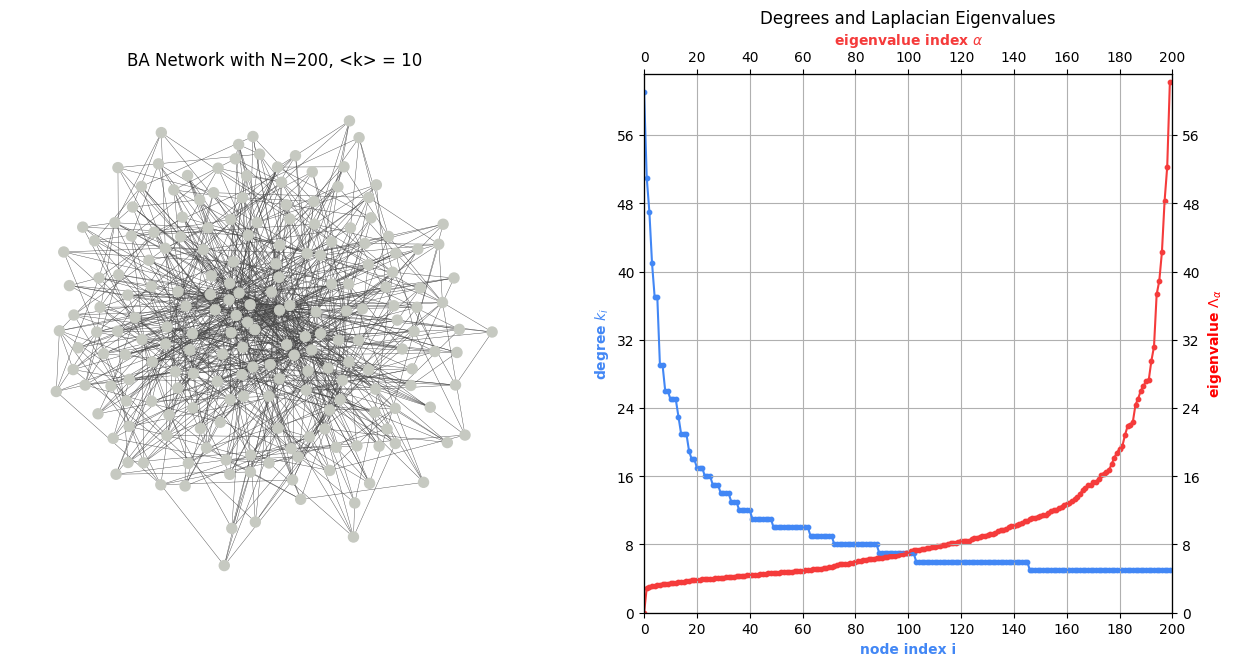

In [88]:
m = int(mean_degree/2)  
ba_graph = ig.Graph.Barabasi(n=num_nodes, m=m)
degrees = ba_graph.degree()
sorted_indices = sorted(range(len(degrees)), key=lambda k: degrees[k], reverse=True)
new_indices = {old_idx: new_idx for new_idx, old_idx in enumerate(sorted_indices)}
reindexed_edges = [(new_indices[edge.source], new_indices[edge.target]) for edge in ba_graph.es]

graph = ig.Graph(edges=reindexed_edges)
laplacian_matrix = np.array(graph.laplacian())
eigenvalues, eigenvectors = np.linalg.eigh(laplacian_matrix) # L = D-Alaplacian_matrix = np.array(graph.laplacian())




layout = graph.layout("fruchterman_reingold")  # Kamada-Kawai layout

fig, axs = plt.subplots(1, 2, figsize=(15, 7)) 
ig.plot(
    graph, 
    layout=layout, 
    target=axs[0], 
    bbox=(800, 800), 
    margin=20, 
    vertex_size=10,
    edge_width=0.3,
    vertex_color = "#c6c9c1",
    vertex_frame_color = "#c6c9c1"
)
axs[0].set_title(f"BA Network with N={num_nodes}, <k> = {mean_degree}")

axs[1].plot(
    range(num_nodes),
    [degrees[sorted_indices[i]] for i in range(num_nodes)],
    color="#4287f5",
    )
axs[1].scatter(
    range(num_nodes),
    [degrees[sorted_indices[i]] for i in range(num_nodes)],
    color="#4287f5",
    s = 10
    )
axs[1].set_xlabel("node index i",  color = "#4287f5", fontdict={'weight': 'bold'})
axs[1].set_ylabel(r"degree $k_i$", color = "#4287f5", fontdict={'weight': 'bold'})

######################################################################################
c = "#f53b3b"
secax_x = axs[1].twiny()
secax_x.set_xlabel(r"eigenvalue index $\alpha$", color=c, fontdict={'weight': 'bold'})
secax_x.xaxis.set_label_position('top')
axs[1].set_xlim(0, num_nodes )
secax_x.set_xlim(0, num_nodes)
axs[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
secax_x.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

secax_y = axs[1].twinx()
secax_y.set_ylabel(r"eigenvalue $\Lambda_α$", color="red", fontdict={'weight': 'bold'})
secax_y.yaxis.set_label_position('right')
upper_limits = [max(degrees), max(eigenvalues)]
axs[1].set_ylim(0, max(upper_limits)+1)
secax_y.set_ylim(0, max(upper_limits)+1)
axs[1].yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
secax_y.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

axs[1].plot(
    range(num_nodes),
    eigenvalues,
    color=c,
    )
axs[1].scatter(
    range(num_nodes),
    eigenvalues,
    color=c,
    s = 10
    )
axs[1].set_title("Degrees and Laplacian Eigenvalues")
axs[1].grid(True)

plt.savefig(f"figures/network_{num_nodes}.pdf")

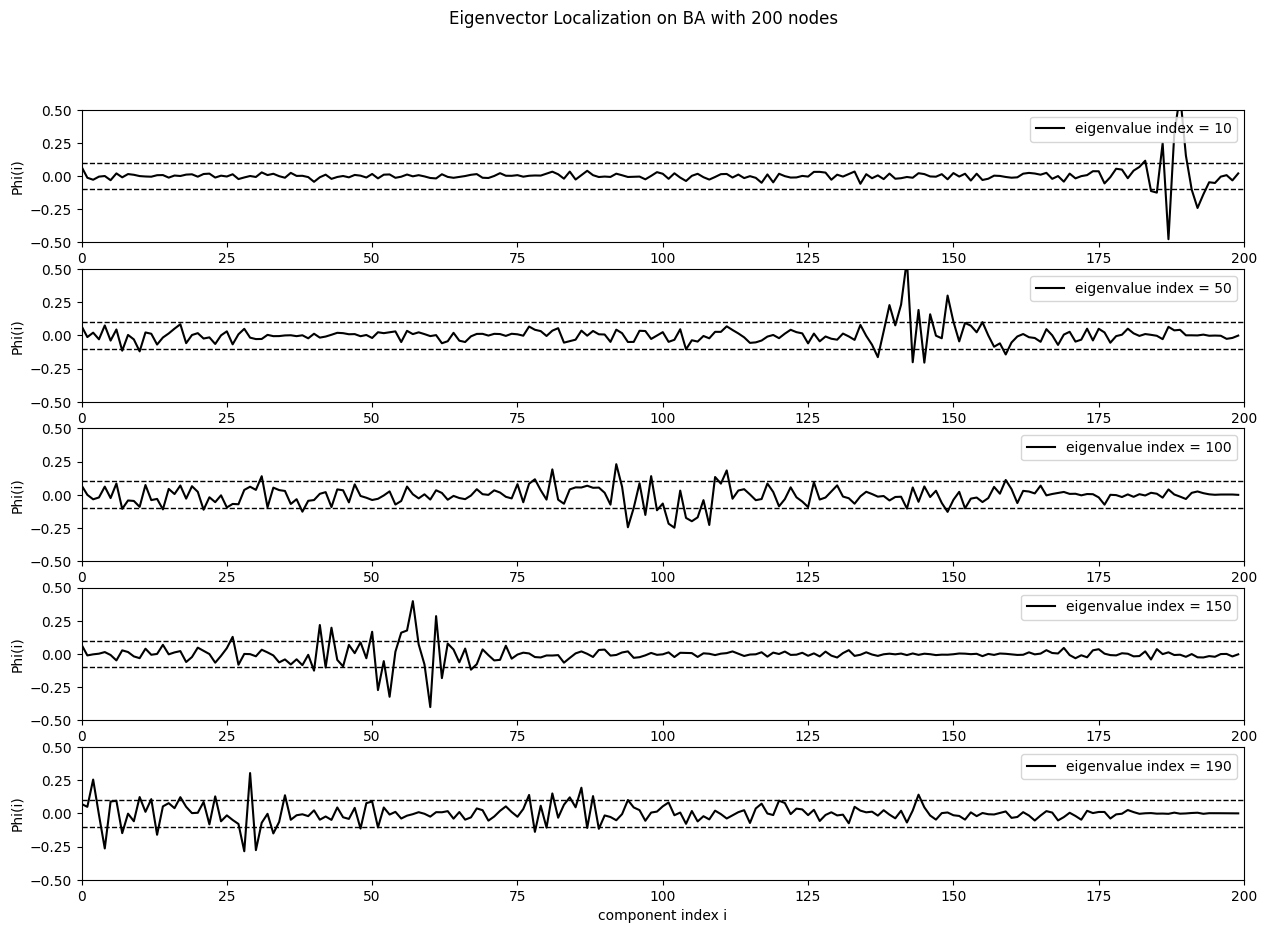

In [93]:
indices = [10, 50, 100, 150, num_nodes - 10]
ythreshold = 0.1

fig, axs = plt.subplots(len(indices), 1, figsize=(15, 10)) 
plt.suptitle(f"Eigenvector Localization on BA with {num_nodes} nodes")

for i,id in enumerate(indices):
    eigenvector = eigenvectors[id]
    axs[i].plot(
        range(num_nodes),
        [eigenvector[n] for n in range(num_nodes)],
        color="black",
        )
    axs[i].set_xlim(0, num_nodes)
    axs[i].set_ylim(-0.5, +0.5)
    axs[i].set_xlabel("")
    axs[i].set_ylabel(f"Phi(i)")
    axs[i].legend([f"eigenvalue index = {id}"], loc='upper right')
    axs[i].axhline(y= + ythreshold, color='black', linestyle='--', linewidth = 1)
    axs[i].axhline(y=- ythreshold, color='black', linestyle='--', linewidth = 1)
axs[len(indices)-1].set_xlabel("component index i")

plt.savefig(f"figures/eigenvectors_{num_nodes}.pdf")

In [ ]:
num_degrees = max(degrees)-min(degrees) + 1

density = np.zeros(num_degrees, num_degrees)

In [ ]:
M_species = np.zeros((8,8))

for mouse_a in np.arange(0, 8):
    for mouse_b in np.arange(0,8):
        n = 0
        for index, row in df.iterrows():
                if row[f'ranks_{mouse_a+1}'] in np.arange(0, N) and row[f'ranks_{mouse_b+1}'] in np.arange(0, N):
                    n += 1
        M_species[mouse_a, mouse_b] = n

fig, ax = plt.subplots()
ax.set_title("Number of correspondent species across mice", fontsize = 14)
ax.imshow(M_species, cmap='Grays')
ax.set_xticks(np.arange(0,8))
ax.set_yticks(np.arange(0,8))
ax.set_xticklabels(['1','2','3','4','5', '6', '7', '8'], fontsize = 14)
ax.set_yticklabels(['1','2','3','4','5', '6', '7', '8'], fontsize = 14)

# Display the values within each cell
for i in range(M_species.shape[0]):
    for j in range(M_species.shape[1]):
        text = ax.text(j, i, f'{M_species[i, j]:.1f}', ha='center', va='center', color='black', fontsize=8)

plt.savefig("Output_Images/correspondence_matrix.pdf")